In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/Assignment/Clustering/crime_data.csv")
df1= df.rename(columns={'Unnamed: 0':'ID'})
df1.head()

,ID,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df1.iloc[:,1:])
df_norm.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


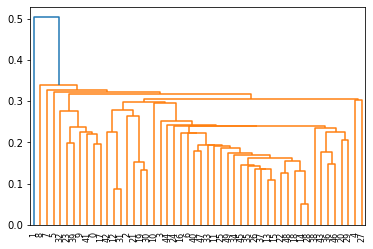

In [5]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [6]:
# create clusters
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete').fit(df_norm)

In [7]:
clusters_labels=pd.Series(model.labels_)

In [8]:
df['Clusters']=clusters_labels

In [9]:
df=df.iloc[:,[0,1,2,3,4,5]]


In [10]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clusters', ylabel='Density'>

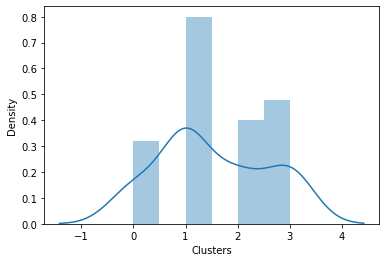

In [12]:
sn.distplot(df['Clusters'])